<center>ML homework 4. Visualization</center>

До заданого датасету додати фічі в ручному режимі та за допомогою FeatureTools



Туторіал

https://github.com/alteryx/open_source_demos/blob/main/predict-next-purchase/Tutorial.ipynb

І ше один приклад:

https://analyticsindiamag.com/introduction-to-featuretools-a-python-framework-for-automated-feature-engineering/

Зверніть увагу на п.17



Додатково для практики із Pandas

https://drive.google.com/drive/folders/1n9hZ3wp1eimXbIHLXdeHtG8_D2Qorbiw?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import featuretools as ft

In [2]:
pld = pd.read_csv("player_data.csv")
pls = pd.read_csv("Players.csv")
sss = pd.read_csv("Seasons_Stats.csv")

In [3]:
pls['Player'].describe()

count                3921
unique               3921
top       Curly Armstrong
freq                    1
Name: Player, dtype: object

In [4]:
pld['name'].describe()

count               4550
unique              4500
top       George Johnson
freq                   3
Name: name, dtype: object

убираем дубликаты имен из датасета pld. конечно дупликаты имен это могут быть разные люди с одинаковым именем и фамилией. для Объединения по pld и pls можна было бы еще проверить по году рождения, но т.к. года рождения в датасете sss нету, а год минус возраст даст нам год рождения с погрешностью в один год, то различить людей с полностью одинаковыми именами и их достижения у нас не полчится. плюс дубликатов там только 50 штук из 4550( что примеро 1.1 %)

In [5]:
pld = pld.drop_duplicates('name')
pld['name'].describe()

count               4500
unique              4500
top       Alaa Abdelnaby
freq                   1
Name: name, dtype: object

In [6]:
sss

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


<center>в датах pls и sss столбец Unnsmed это просто порядковый номер строки, поэтому сразу его удаляем</center>

In [7]:
pls.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
sss.drop('Unnamed: 0', axis = 1, inplace = True)

<center>Объединяем pls и pld по имени игроков </center>

In [9]:
print(pld.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4500 non-null   object 
 1   year_start  4500 non-null   int64  
 2   year_end    4500 non-null   int64  
 3   position    4499 non-null   object 
 4   height      4499 non-null   object 
 5   weight      4494 non-null   float64
 6   birth_date  4469 non-null   object 
 7   college     4198 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 316.4+ KB
None


In [10]:
res = pd.merge(pls, pld, how = 'outer', left_on = 'Player', right_on = 'name')
res

,Player,height_x,weight_x,collage,born,birth_city,birth_state,name,year_start,year_end,position,height_y,weight_y,birth_date,college
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,Curly Armstrong,1949.0,1951.0,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,Cliff Barker,1950.0,1952.0,G,6-2,185.0,"January 15, 1921",University of Kentucky
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,Leo Barnhorst,1950.0,1954.0,F-G,6-4,190.0,"May 11, 1924",University of Notre Dame
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,Ed Bartels,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,Ralph Beard,1950.0,1951.0,G,5-10,175.0,"December 2, 1927",University of Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guerschon Yabusele,2018.0,2018.0,F,6-7,260.0,"December 17, 1995",NaN
4653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,George Yardley,1954.0,1960.0,F-G,6-5,190.0,"November 3, 1928",Stanford University
4654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harry Zeller,1947.0,1947.0,C-F,6-4,210.0,"July 10, 1919",Washington & Jefferson College
4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ante Zizic,2018.0,2018.0,F-C,6-11,250.0,"January 4, 1997",NaN


<center>Переводим футы, дюймы в сантиметры</center>

In [11]:
res[['height_foot','height_inch']] = res['height_y'].str.split('-', 1, expand= True)
res['height_y'] = (pd.to_numeric(res['height_foot']) * 30.48  + pd.to_numeric(res['height_inch']) * 2.54) // 1
res.drop(['height_foot', 'height_inch'], axis = 1, inplace = True)


C:\Users\kolya\AppData\Local\Temp\ipykernel_26828\1433083667.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  res[['height_foot','height_inch']] = res['height_y'].str.split('-', 1, expand= True)


<center>Заполняем одинаковвые значение. Дату и месяц рождения удаляем как нунжные данные</center>

In [12]:
res['Player'] = res['Player'].fillna(res['name'])
res['height_x'] = res['height_x'].fillna(res['height_y'])
res['weight_x'] = res['weight_x'].fillna(res['weight_y'])
res['collage'] = res['collage'].fillna(res['college'])
res['born'] = res['born'].fillna(res['birth_date'].str.split(',', 1, expand= True)[1])
res

C:\Users\kolya\AppData\Local\Temp\ipykernel_26828\508671465.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  res['born'] = res['born'].fillna(res['birth_date'].str.split(',', 1, expand= True)[1])


,Player,height_x,weight_x,collage,born,birth_city,birth_state,name,year_start,year_end,position,height_y,weight_y,birth_date,college
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,Curly Armstrong,1949.0,1951.0,G-F,180.0,170.0,"November 1, 1918",Indiana University
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,Cliff Barker,1950.0,1952.0,G,187.0,185.0,"January 15, 1921",University of Kentucky
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,Leo Barnhorst,1950.0,1954.0,F-G,193.0,190.0,"May 11, 1924",University of Notre Dame
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,Ed Bartels,1950.0,1951.0,F,195.0,195.0,"October 8, 1925",North Carolina State University
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,Ralph Beard,1950.0,1951.0,G,177.0,175.0,"December 2, 1927",University of Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,Guerschon Yabusele,200.0,260.0,NaN,1995,NaN,NaN,Guerschon Yabusele,2018.0,2018.0,F,200.0,260.0,"December 17, 1995",NaN
4653,George Yardley,195.0,190.0,Stanford University,1928,NaN,NaN,George Yardley,1954.0,1960.0,F-G,195.0,190.0,"November 3, 1928",Stanford University
4654,Harry Zeller,193.0,210.0,Washington & Jefferson College,1919,NaN,NaN,Harry Zeller,1947.0,1947.0,C-F,193.0,210.0,"July 10, 1919",Washington & Jefferson College
4655,Ante Zizic,210.0,250.0,NaN,1997,NaN,NaN,Ante Zizic,2018.0,2018.0,F-C,210.0,250.0,"January 4, 1997",NaN


<center>Удаляем лишние ячейки</center>

In [13]:
res.drop(['name', 'height_y', 'weight_y', 'birth_date', 'college'], axis = 1, inplace = True)
res

,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949.0,1951.0,G-F
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,1952.0,G
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950.0,1954.0,F-G
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,1950.0,1951.0,F
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950.0,1951.0,G
...,...,...,...,...,...,...,...,...,...,...
4652,Guerschon Yabusele,200.0,260.0,NaN,1995,NaN,NaN,2018.0,2018.0,F
4653,George Yardley,195.0,190.0,Stanford University,1928,NaN,NaN,1954.0,1960.0,F-G
4654,Harry Zeller,193.0,210.0,Washington & Jefferson College,1919,NaN,NaN,1947.0,1947.0,C-F
4655,Ante Zizic,210.0,250.0,NaN,1997,NaN,NaN,2018.0,2018.0,F-C


<center>изменяем типы данных</center>

In [14]:
res = res.fillna(0)
res = res.astype({'height_x': np.int16, 'weight_x': np.int16, 'born': np.int16, 'year_start': np.int16, 'year_end': np.int16})
res.replace(0, 'NaN')


,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position
0,Curly Armstrong,180,77,Indiana University,1918,NaN,NaN,1949,1951,G-F
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana,1950,1952,G
2,Leo Barnhorst,193,86,University of Notre Dame,1924,NaN,NaN,1950,1954,F-G
3,Ed Bartels,196,88,North Carolina State University,1925,NaN,NaN,1950,1951,F
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky,1950,1951,G
...,...,...,...,...,...,...,...,...,...,...
4652,Guerschon Yabusele,200,260,NaN,1995,NaN,NaN,2018,2018,F
4653,George Yardley,195,190,Stanford University,1928,NaN,NaN,1954,1960,F-G
4654,Harry Zeller,193,210,Washington & Jefferson College,1919,NaN,NaN,1947,1947,C-F
4655,Ante Zizic,210,250,NaN,1997,NaN,NaN,2018,2018,F-C


<center> Добавляем количество лет в игре и коэфициент ожирения (отношение веса к росту)</center>

In [15]:
res['experience'] = res['year_end'] - res['year_start']
res['obesity rate'] = res['weight_x'] / res['height_x']
res

,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,experience,obesity rate
0,Curly Armstrong,180,77,Indiana University,1918,0,0,1949,1951,G-F,2,0.427778
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana,1950,1952,G,2,0.441489
2,Leo Barnhorst,193,86,University of Notre Dame,1924,0,0,1950,1954,F-G,4,0.445596
3,Ed Bartels,196,88,North Carolina State University,1925,0,0,1950,1951,F,1,0.448980
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky,1950,1951,G,1,0.443820
...,...,...,...,...,...,...,...,...,...,...,...,...
4652,Guerschon Yabusele,200,260,0,1995,0,0,2018,2018,F,0,1.300000
4653,George Yardley,195,190,Stanford University,1928,0,0,1954,1960,F-G,6,0.974359
4654,Harry Zeller,193,210,Washington & Jefferson College,1919,0,0,1947,1947,C-F,0,1.088083
4655,Ante Zizic,210,250,0,1997,0,0,2018,2018,F-C,0,1.190476


C:\Users\kolya\AppData\Local\Temp\ipykernel_26828\2216787009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(res.corr())


<AxesSubplot: >

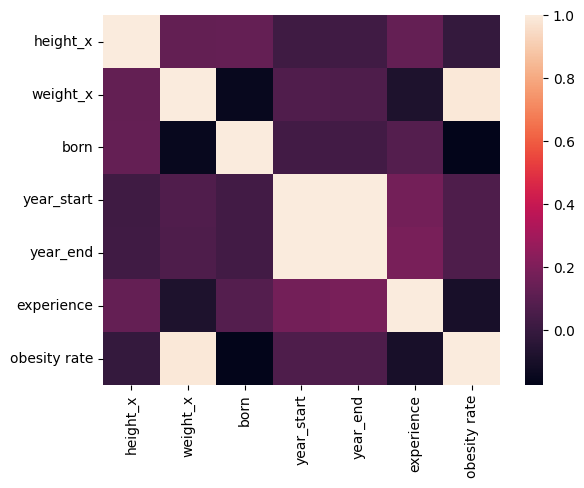

In [16]:
sns.heatmap(res.corr())

Мы видим, что вес коррелюет с коэффициентом ожирения, а год начала с годом конца. Удаляем эти ячейки

In [17]:
res.drop(['weight_x', 'year_end'], axis=1, inplace=True)
res

,Player,height_x,collage,born,birth_city,birth_state,year_start,position,experience,obesity rate
0,Curly Armstrong,180,Indiana University,1918,0,0,1949,G-F,2,0.427778
1,Cliff Barker,188,University of Kentucky,1921,Yorktown,Indiana,1950,G,2,0.441489
2,Leo Barnhorst,193,University of Notre Dame,1924,0,0,1950,F-G,4,0.445596
3,Ed Bartels,196,North Carolina State University,1925,0,0,1950,F,1,0.448980
4,Ralph Beard,178,University of Kentucky,1927,Hardinsburg,Kentucky,1950,G,1,0.443820
...,...,...,...,...,...,...,...,...,...,...
4652,Guerschon Yabusele,200,0,1995,0,0,2018,F,0,1.300000
4653,George Yardley,195,Stanford University,1928,0,0,1954,F-G,6,0.974359
4654,Harry Zeller,193,Washington & Jefferson College,1919,0,0,1947,C-F,0,1.088083
4655,Ante Zizic,210,0,1997,0,0,2018,F-C,0,1.190476


array([[<AxesSubplot: title={'center': 'height_x'}>,
        <AxesSubplot: title={'center': 'born'}>],
       [<AxesSubplot: title={'center': 'year_start'}>,
        <AxesSubplot: title={'center': 'experience'}>],
       [<AxesSubplot: title={'center': 'obesity rate'}>, <AxesSubplot: >]],
      dtype=object)

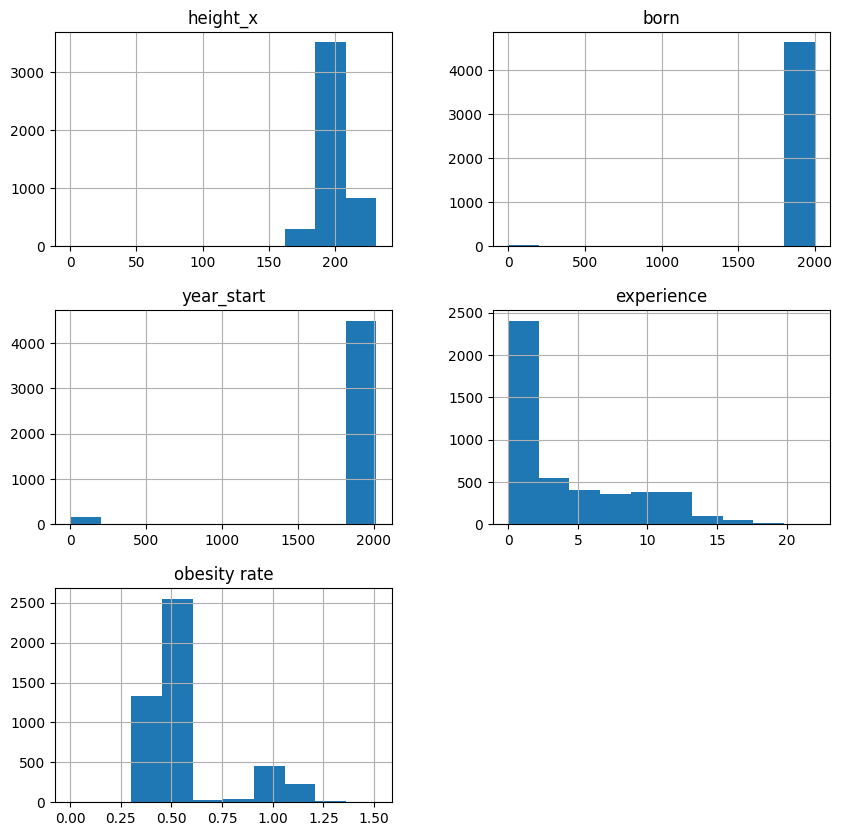

In [18]:
features = ['height_x', 'born', 'year_start', 'experience', 'obesity rate']
res[features].hist(figsize=(10, 10))

графики не показательны, видно только что для коэффициента ожирения и опыта нормального распределения нет

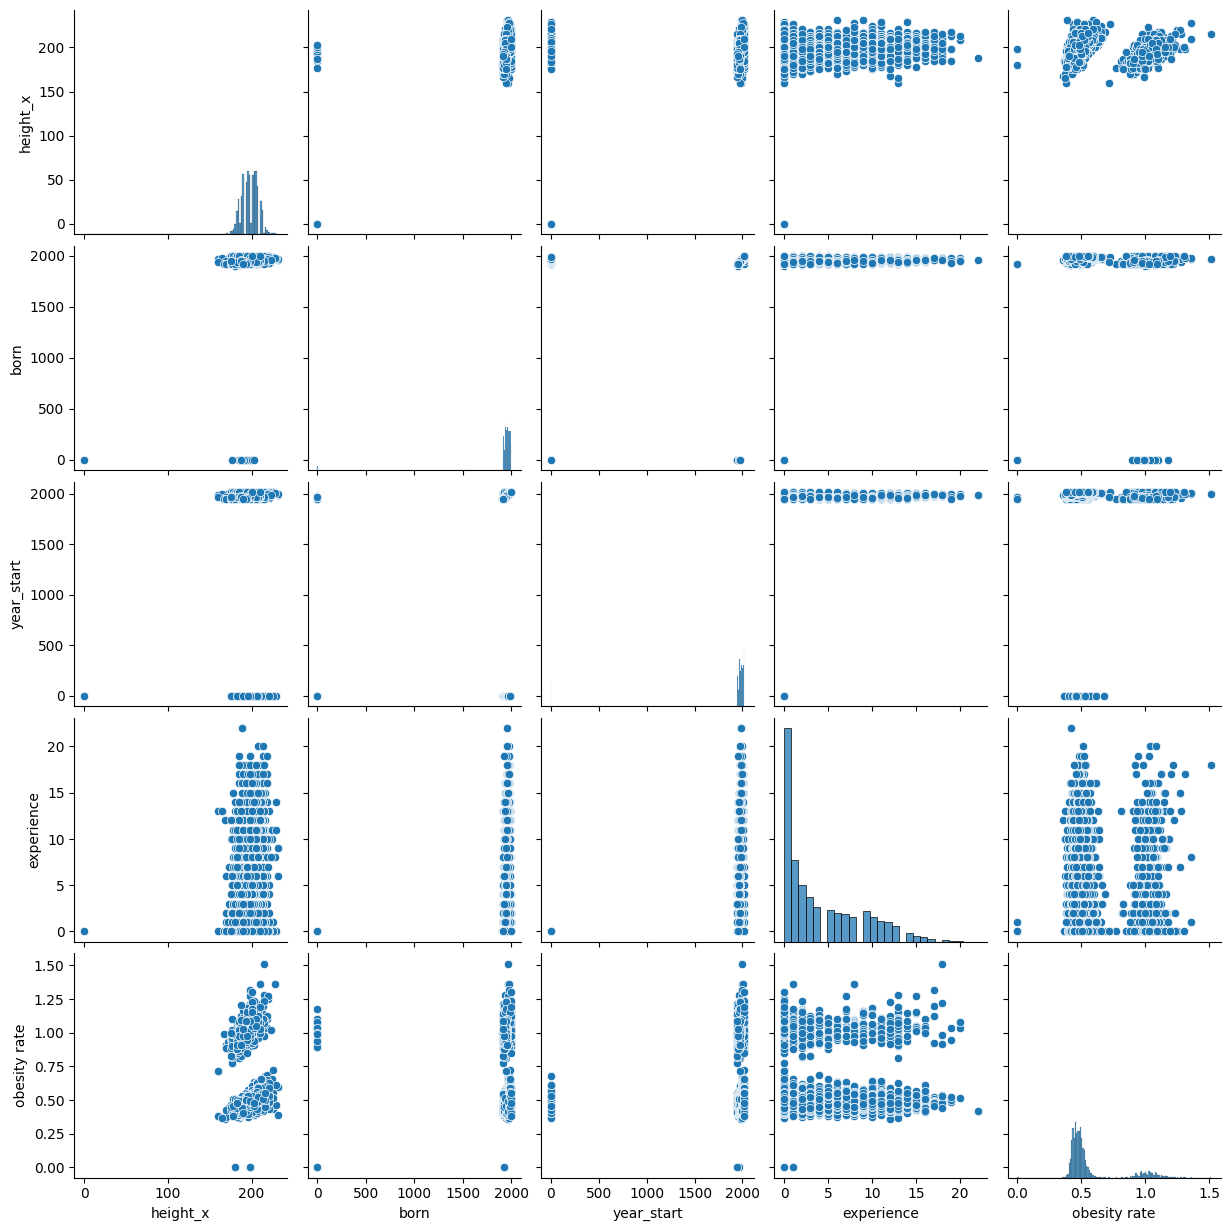

In [19]:
sns.pairplot(res)

убираем из таблицы нулевые значения для года рождения, роста, года начала карьеры и коэффициента ожирения

In [20]:
res[res['born'] == 0] = np.nan
res[res['height_x'] == 0] = np.nan
res[res['year_start'] == 0] = np.nan
res[res['obesity rate'] == 0] = np.nan

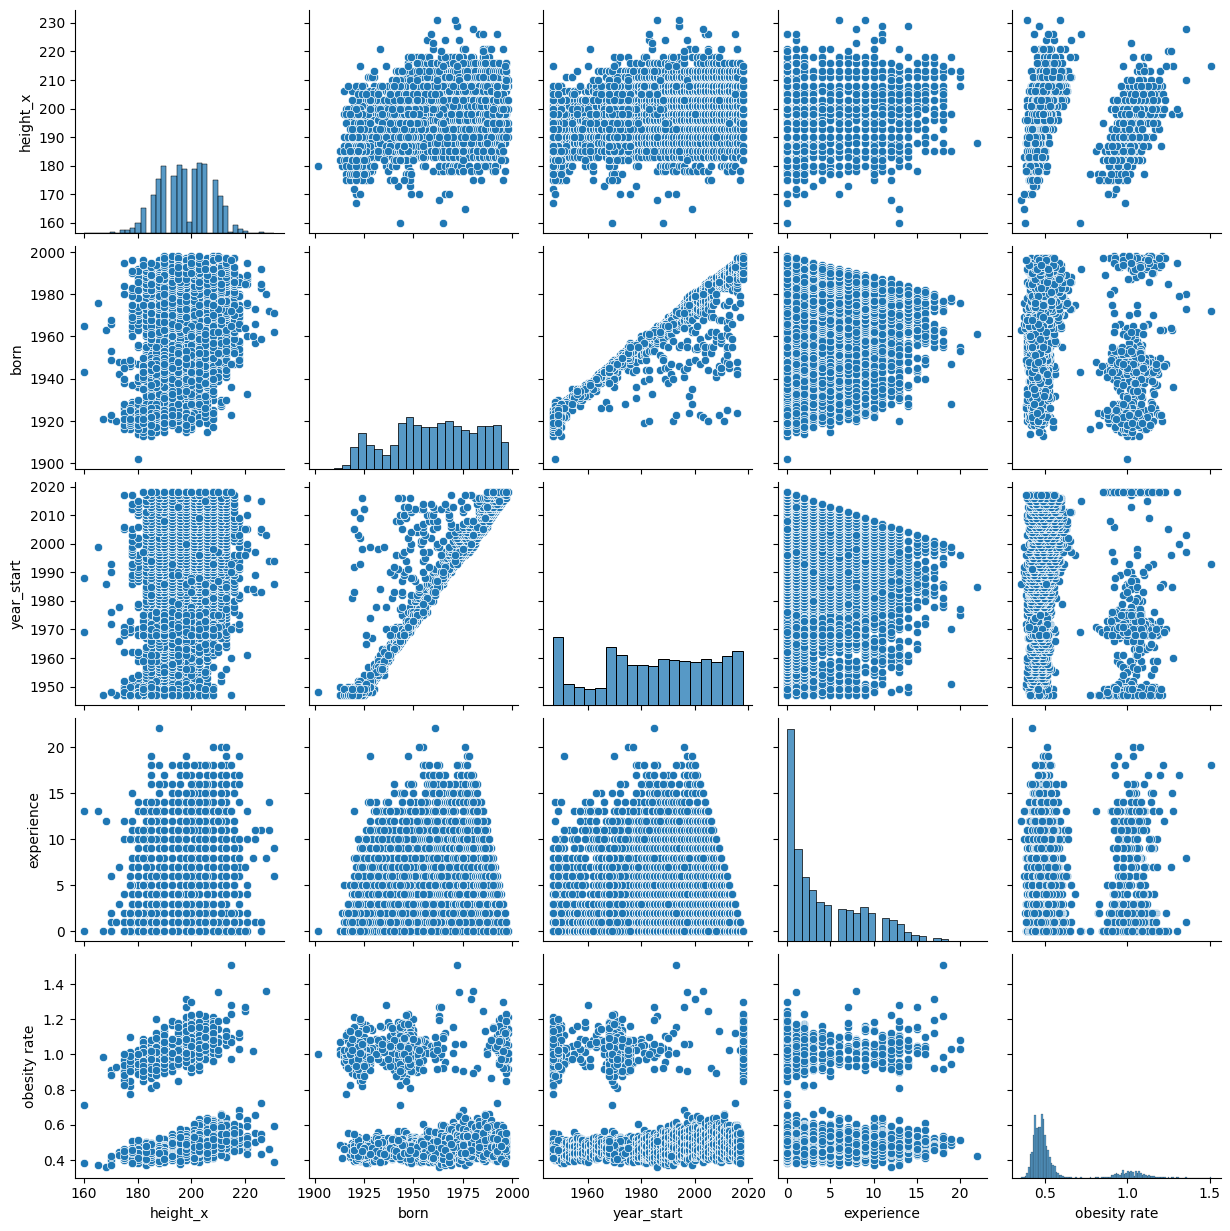

In [21]:
sns.pairplot(res)

из графиков видно, что среди спортменов почти нету людей со средним коэффициентом ожиренияб во вторых как правило чем позже год рождения человека, тем позже он начинает карьеру и в третьих чем позже человек начал карьеру, тем меньше у него опыт(последние два факта очевидны)

In [22]:
res['Player'].describe

<bound method NDFrame.describe of 0          Curly Armstrong
1             Cliff Barker
2            Leo Barnhorst
3               Ed Bartels
4              Ralph Beard
               ...        
4652    Guerschon Yabusele
4653        George Yardley
4654          Harry Zeller
4655            Ante Zizic
4656            Matt Zunic
Name: Player, Length: 4657, dtype: object>

In [23]:
res = res.dropna(subset='Player')

In [24]:
es = ft.EntitySet(id = 'statistic')


In [25]:
es = es.add_dataframe(dataframe_name="sss", dataframe=sss, index='index')
es = es.add_dataframe(dataframe_name="res", dataframe=res, index='Player')


d:\programs\python\lib\site-packages\featuretools\entityset\entityset.py:1906: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(


In [26]:
relation = ft.Relationship(es, 'res', 'Player', 'sss', 'Player')

In [27]:
es = es.add_relationships([relation])

d:\programs\python\lib\site-packages\featuretools\entityset\entityset.py:414: UserWarning: Logical type Categorical for child column Player does not match parent column Player logical type Unknown. Changing child logical type to match parent.
  warnings.warn(


In [28]:
default_agg_primitives =  [ "sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
feature_names = ft.dfs(entityset = es, agg_primitives=default_agg_primitives,  target_dataframe_name= 'res',  features_only=True)



d:\programs\python\lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['percent_true']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


In [29]:
feature_names

[<Feature: height_x>,
 <Feature: collage>,
 <Feature: born>,
 <Feature: birth_state>,
 <Feature: year_start>,
 <Feature: position>,
 <Feature: experience>,
 <Feature: obesity rate>,
 <Feature: COUNT(sss)>,
 <Feature: MAX(sss.2P)>,
 <Feature: MAX(sss.2P%)>,
 <Feature: MAX(sss.2PA)>,
 <Feature: MAX(sss.3P)>,
 <Feature: MAX(sss.3P%)>,
 <Feature: MAX(sss.3PA)>,
 <Feature: MAX(sss.3PAr)>,
 <Feature: MAX(sss.AST)>,
 <Feature: MAX(sss.AST%)>,
 <Feature: MAX(sss.Age)>,
 <Feature: MAX(sss.BLK)>,
 <Feature: MAX(sss.BLK%)>,
 <Feature: MAX(sss.BPM)>,
 <Feature: MAX(sss.DBPM)>,
 <Feature: MAX(sss.DRB)>,
 <Feature: MAX(sss.DRB%)>,
 <Feature: MAX(sss.DWS)>,
 <Feature: MAX(sss.FG)>,
 <Feature: MAX(sss.FG%)>,
 <Feature: MAX(sss.FGA)>,
 <Feature: MAX(sss.FT)>,
 <Feature: MAX(sss.FT%)>,
 <Feature: MAX(sss.FTA)>,
 <Feature: MAX(sss.FTr)>,
 <Feature: MAX(sss.G)>,
 <Feature: MAX(sss.GS)>,
 <Feature: MAX(sss.MP)>,
 <Feature: MAX(sss.OBPM)>,
 <Feature: MAX(sss.ORB)>,
 <Feature: MAX(sss.ORB%)>,
 <Feature: MAX(

по выводам логичнее было бы удалить значение Nan изначально, но я хотел отдельно показать как создаются фичи и анализ вручную и как создавать фичи c помощью фичатулс. Анализ созданных с помощью программы фич не делал, так как не было такого задания.